In [2]:
import numpy as np
import pandas as pd
from tqdm import tqdm

1 лаба


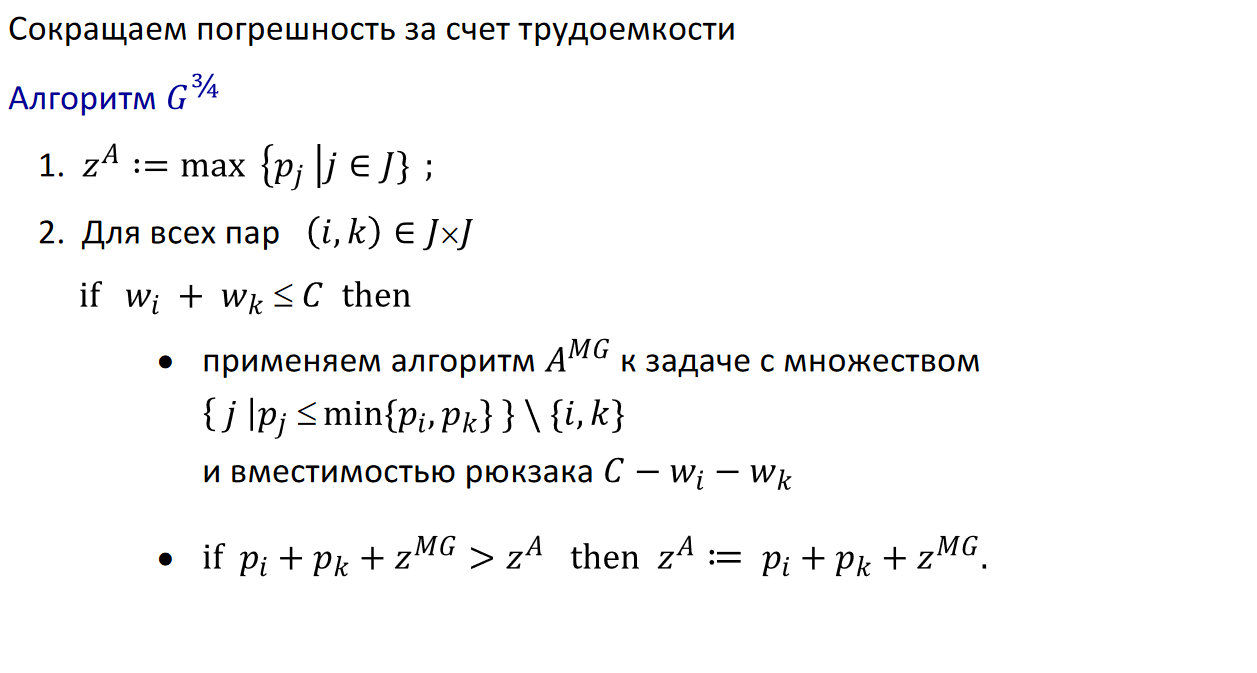

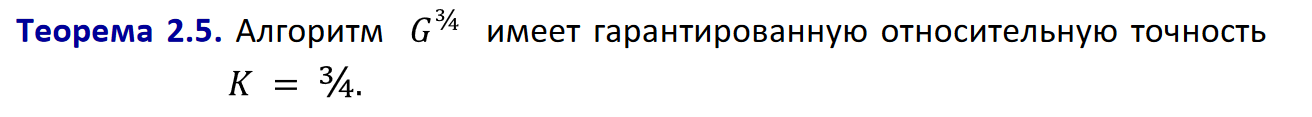

In [3]:
df = pd.read_csv('knapPI_1_1000_1000.csv', delimiter=';')

In [4]:
df

,knapsack capacity,5002
0,94,485
1,506,326
2,416,248
3,992,421
4,649,322
...,...,...
995,949,336
996,89,931
997,488,588
998,568,449


In [37]:
p = df['knapsack capacity'].to_numpy()
w = df['5002'].to_numpy()
C = 5002
df_len = len(df)

In [43]:
c = p/w
el = list(zip(p,w,c))
el.sort(key = lambda a:a[2], reverse = True)
p, w, _ = zip(*el)

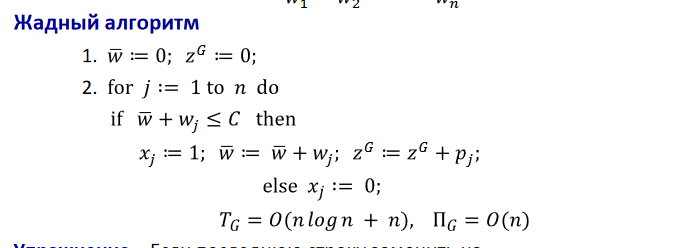

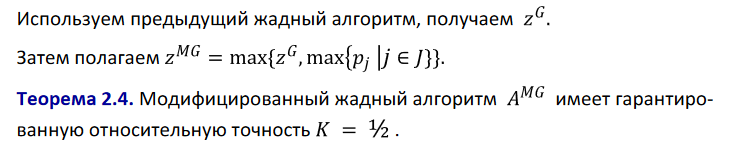

In [52]:
def a_mg(list_i_j,C):
    w_ = 0
    z_g = 0
    x = np.zeros(1000)
    for i in list_i_j:
        if w_+w[i]<=C:
            x[i] = 1
            w_ +=w[i]
            z_g +=p[i]
    list_i_j.append(-111111)
    z_mg = np.max([z_g, max(list_i_j)])
    return z_g

In [53]:
z_a = np.max(p)
for i in  range(df_len):
    for j in range(df_len):
        if w[i] + w[j] <= C:
            _min = min([p[i], p[j]])
            list_i_j = []
            for l in range(df_len):
                if l!= i and l != j and p[l]<=_min:
                    list_i_j.append(l)
            z_mg = a_mg(list_i_j, C - w[i] - w[j])
            if p[i] + p[j] + z_mg > z_a:
                z_a = p[i] + p[j] + z_mg
    

In [187]:
a_mg(set(range(len(w))), C)

IndexError: index 6 is out of bounds for axis 0 with size 6

In [54]:
z_a

55290

ЛАБА 2

In [188]:
bin_size = 100 + 0.000001
with open('binpack.txt','r') as f:
    binpack = f.read()
    
binpack = np.array(binpack.split('\n')[1:], dtype = np.float)

C:\Users\Huawei\AppData\Local\Temp\ipykernel_7388\2997210504.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  binpack = np.array(binpack.split('\n')[1:], dtype = np.float)


In [189]:
binpack


array([36.6, 26.8, 36.6, 43. , 26.3, 30.7, 41.4, 28.7, 29.9, 49.5, 25.1,
       25.4, 47.4, 25.2, 27.4, 37. , 26.9, 36.1, 47.3, 25.2, 27.5, 47.2,
       25.9, 26.9, 44.4, 25.8, 29.8, 43.9, 27.3, 28.8, 44.5, 27.2, 28.3,
       41.9, 26.1, 32. , 36.3, 27.1, 36.6, 35.5, 27.3, 37.2, 46.6, 26.2,
       27.2, 35.7, 29.2, 35.1, 39.5, 25.5, 35. , 35. , 30.3, 34.7, 45. ,
       25.2, 29.8, 41. , 27.5, 31.5, 40.7, 26. , 33.3, 36.6, 27.1, 36.3,
       35. , 29.4, 35.6, 48. , 25.3, 26.7, 44.6, 25.9, 29.5, 37.6, 26.7,
       35.7, 36.6, 28.2, 35.2, 47.8, 25.6, 26.6, 42. , 25.1, 32.9, 43.4,
       25.2, 31.4, 47. , 25.4, 27.6, 49.7, 25. , 25.3, 49.7, 25. , 25.3,
       44.5, 25.4, 30.1, 41.2, 26.3, 32.5, 40. , 29.8, 30.2, 36.2, 28.2,
       35.6, 40.5, 25.9, 33.6, 39.7, 29. , 31.3, 48.5, 25.3, 26.2, 36.7,
       27.4, 35.9, 35.5, 26.3, 38.2, 47.1, 25.8, 27.1, 46.4, 25.9, 27.7,
       42.6, 28.1, 29.3, 49.8, 25. , 25.2, 39.2, 25.7, 35.1, 48.5, 25.1,
       26.4, 44.1, 27.2, 28.7, 39.2, 27.5, 33.3, 35

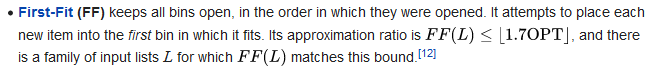

In [190]:
def first_fit(item, current_bins, bin_size):
    for i in range(len(current_bins)):
        if current_bins[i] + item < bin_size:
            current_bins[i] += item
            return current_bins
    return current_bins + [item]

In [191]:
def flow_fit(binpack, bin_size):
    current_bins = [0]
    for it in binpack:
        current_bins = first_fit(it, current_bins, bin_size)
    return len(current_bins)

In [211]:
np.random.shuffle(binpack)

In [208]:
flow_fit(binpack, bin_size )

187

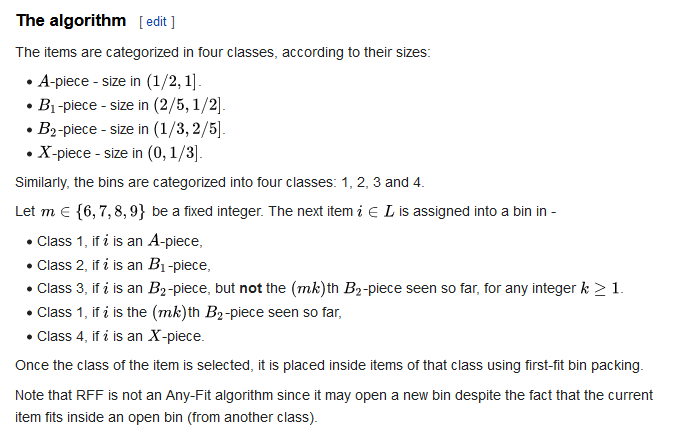

In [212]:
def mod_ff(binpack, bin_size):
    class_1 = []
    class_2 = []
    class_3 = []
    class_4 = []
    for item in binpack:
        if item > bin_size/2:
            class_1.append(item)
        elif item > 2*bin_size/5:
            class_2.append(item)
        elif item > bin_size/3:
            class_3.append(item)
        else:
            class_4.append(item)
    return flow_fit(class_1 + class_2 + class_3 + class_4, bin_size)
        

In [213]:
mod_ff(binpack, bin_size)


190

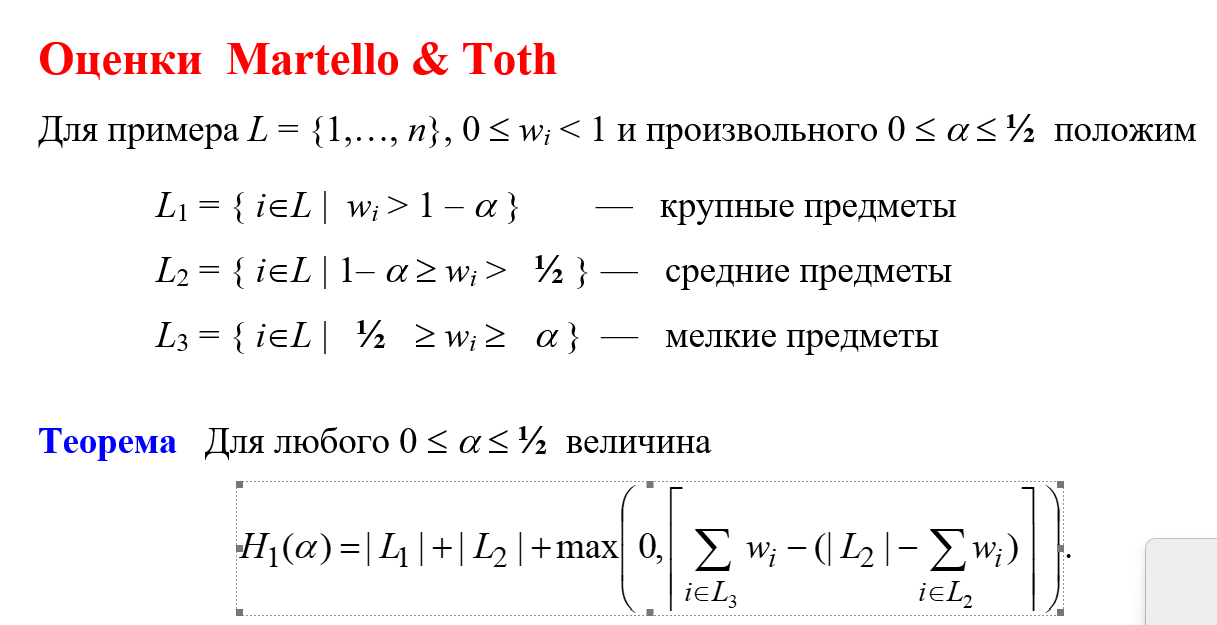

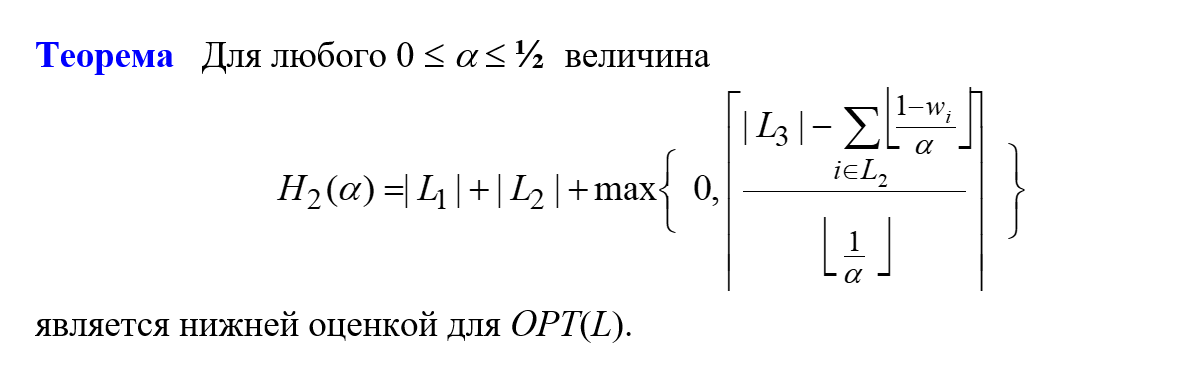

In [126]:
def martello_torth(binpack, alpha, bin_size):
    L_1 = []
    L_2 = []
    L_3 = []
    w = np.array(binpack) / bin_size
    for i in range(len(binpack)):
        if w[i] > 1 - alpha:
            L_1.append(w[i])
        elif w[i] > 1/2:
            L_2.append(w[i])
        elif w[i] >= alpha:
            L_3.append(w[i])
    H1 = len(L_1) + len(L_2) + max(0, sum(L_3) - (len(L_2) - sum(L_2)))
    H2 = len(L_1) + len(L_2) + max(0, np.ceil(len(L_3) - sum([np.floor(1-k)  for k in w])/alpha)/np.floor(1/alpha))
    return H1, H2                                
    

In [197]:
martello_torth(binpack, 0.1, bin_size)

(166.99999833000038, 50.1)

Лаба 3


In [216]:
all_pos_comb_100 = np.array( [
                        [1, 1, 0, 1],
                           [0, 0, 0, 6], 
                           [0, 1, 1, 0], 
                           [0, 5, 0, 0],
                           [0, 2, 0, 4], 
                           [0, 1, 0, 4], 
                           [0, 0, 1, 2],
                           [1, 0, 0, 0],
                           [0, 1, 0, 0],
                           [0, 0, 1, 0],
                           [0, 0, 0, 1]                        
                           ])

TypeError: unhashable type: 'list'

In [217]:
all_pos_comb_ogr = np.array( [
                        [1, 1, 0, 1],
                           [0, 0, 0, 6], 
                           [0, 1, 1, 0], 
                           [0, 5, 0, 0],
                           [0, 2, 0, 4], 
                           [0, 1, 0, 4], 
                           [0, 0, 1, 2],
                           [1, 0, 0, 0],
                           [0, 1, 0, 0],
                           [0, 0, 1, 0],
                           [0, 0, 0, 1]                        
                           ])


In [218]:
import gurobipy as gp
from gurobipy import GRB

In [219]:

model = gp.Model()

num_100 = len(all_pos_comb_100)
num_ogr = len(all_pos_comb_ogr)
lists_ogr_num = 50

x = model.addVars(len(all_pos_comb_100), name='x', vtype=GRB.INTEGER)
y = model.addVars(len(all_pos_comb_ogr), name='y', vtype=GRB.INTEGER)

fig_order = [700, 1000, 555, 1111]

model.addConstrs((fig_order[i] == sum([(x[j] * all_pos_comb_100[j][i]) for j in range(num_100)]) 
                  + sum([(y[j] * all_pos_comb_ogr[j][i]) for j in range(num_ogr)]) for i in range(4)), name='each order completed')
model.addConstr(y.sum() <= lists_ogr_num)

model.setObjective(x.sum(), GRB.MINIMIZE)
model.update()

In [220]:
model.optimize()

Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (win64)

CPU model: 12th Gen Intel(R) Core(TM) i7-12700H, instruction set [SSE2|AVX|AVX2]
Thread count: 14 physical cores, 20 logical processors, using up to 20 threads

Optimize a model with 5 rows, 22 columns and 45 nonzeros
Model fingerprint: 0x3326b617
Variable types: 0 continuous, 22 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 6e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [5e+01, 1e+03]
Found heuristic solution: objective 1641.0000000
Presolve time: 0.00s
Presolved: 5 rows, 22 columns, 45 nonzeros
Variable types: 0 continuous, 22 integer (0 binary)
Found heuristic solution: objective 1636.0000000

Root relaxation: objective 1.205000e+03, 9 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0 

{0: <gurobi.Var y[0] (value 0.0)>,
 1: <gurobi.Var y[1] (value 50.0)>,
 2: <gurobi.Var y[2] (value -0.0)>,
 3: <gurobi.Var y[3] (value -0.0)>,
 4: <gurobi.Var y[4] (value -0.0)>,
 5: <gurobi.Var y[5] (value -0.0)>,
 6: <gurobi.Var y[6] (value -0.0)>,
 7: <gurobi.Var y[7] (value -0.0)>,
 8: <gurobi.Var y[8] (value -0.0)>}

In [156]:
sum_ = 0
for l in x.values():
    sum_ += l.x

In [158]:
sum_ - 100


1105.0

лаба 7


In [244]:
a = np.array([[0,1,1,0,0,0]*10,[0,0,0,1,0,0]*10,[0,0,0,1,1,0]*10,[0,0,0,0,0,1]*10,[0,0,0,0,0,1]*10,[0,0,0,0,0,0]*10]*10)
p = np.array([2,3,4,1,8,3]*10)


In [245]:
a

array([[0, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0]])

In [246]:
a.shape

(60, 60)

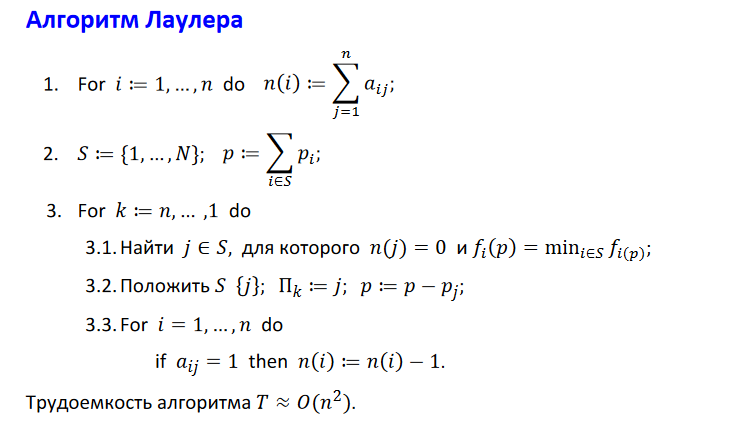

In [247]:
n = 60
print(n)
N = np.zeros(n)
for i in range(n):
    for j in range(n):
        N[i]+=a[i,j]
        
s = set(range(n))
P = np.sum(p)
schedule = np.zeros(n)
for i in range(n-1,-1, -1):
    j = np.min(np.argwhere(N == 0))

    s.remove(j)
    N[j] = np.inf
    schedule[i] = j
    P -=p[j]
    for k in range(n):
        if a[k,j] == 1:
            N[k]-=1
    
print(schedule+1)

60
[55. 49. 43. 37. 31. 25. 19. 13.  7.  1. 57. 51. 45. 39. 33. 27. 21. 15.
  9.  3. 59. 56. 50. 44. 38. 32. 26. 20. 14.  8.  2. 58. 53. 52. 47. 46.
 41. 40. 35. 34. 29. 28. 23. 22. 17. 16. 11. 10.  5.  4. 60. 54. 48. 42.
 36. 30. 24. 18. 12.  6.]


In [249]:
len(set(schedule))


60

In [222]:
N = np.zeros(n)
for i in range(n):
    for j in range(n):
        N[i]+=a[i,j]
np.argwhere(N == 0)        

array([], shape=(0, 1), dtype=int64)

лаба 9

In [181]:
I_card = 20
J_card = 100
c = [35,47,47,38,37,41,48,45,29,27,24,21,20,41,25,47,40,48,48,50]
a = np.loadtxt("setcover.txt")

In [170]:
a

array([[0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [182]:
X = set()
J = set()
I = set(range(I_card))
j_k = [set()]*I_card

for i_ in range(I_card):
    temp = set()
    for j_ in range(J_card):
        if a[i_,j_] == 1:
            temp.add(j_)
    j_k[i_] = temp

while len(J)!=J_card:
    min_= np.inf
    i_0 = 0
    for i in I.difference(X):
        if len(j_k[i]) != 0 and min_> c[i]/(len(j_k[i])) :
            i_0 = i
            min_ = c[i]/(len(j_k[i]))
    X.add(i_0)
    J = J.union(j_k[i_0])
    for i in I.difference(X):
        j_k[i]=j_k[i].difference(j_k[i_0])

In [183]:
val = 0
for x in X:
    val +=c[x]
print(val)
print(X)

245
{2, 4, 8, 9, 10, 11, 12, 16}
